In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('cr_loan2.csv')

# Explore the data types of each column
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

We inspect the dataset using functions like info() and describe() to understand its structure and summary statistics.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [10]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


Data Preparation
To ensure the dataset is suitable for modeling, we need to handle missing values, encode categorical variables, and split the data into training and testing sets.

### Handling Missing Values

In [5]:
# Check columns with null values
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [7]:
# Impute the null values with the median value for all employment lengths
df['person_emp_length'].fillna((df['person_emp_length'].median()), inplace = True)

In [9]:
# Drop the records with missing values for interest rate 
print(df['loan_int_rate'].isnull().sum())
indices = df[df['loan_int_rate'].isnull()].index
df = df.drop(indices)
df.shape

3116


(29465, 12)

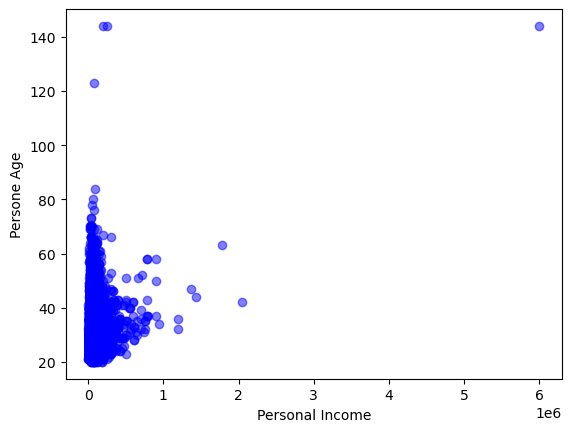

In [11]:
# Plot a scatter plot of income against age
plt.scatter(df['person_income'], df['person_age'],c='blue', alpha=0.5)
plt.xlabel('Personal Income')
plt.ylabel('Persone Age')
plt.show()

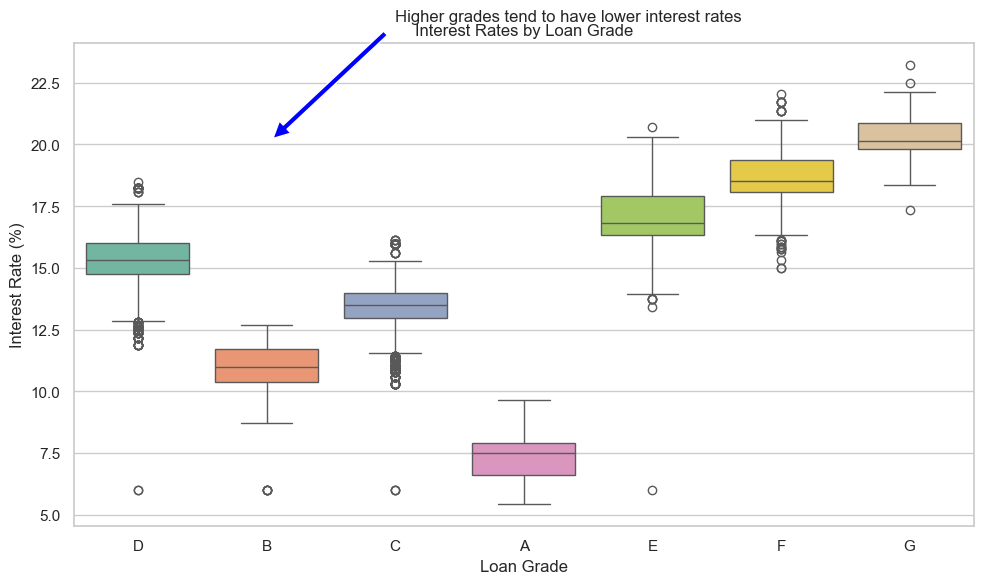

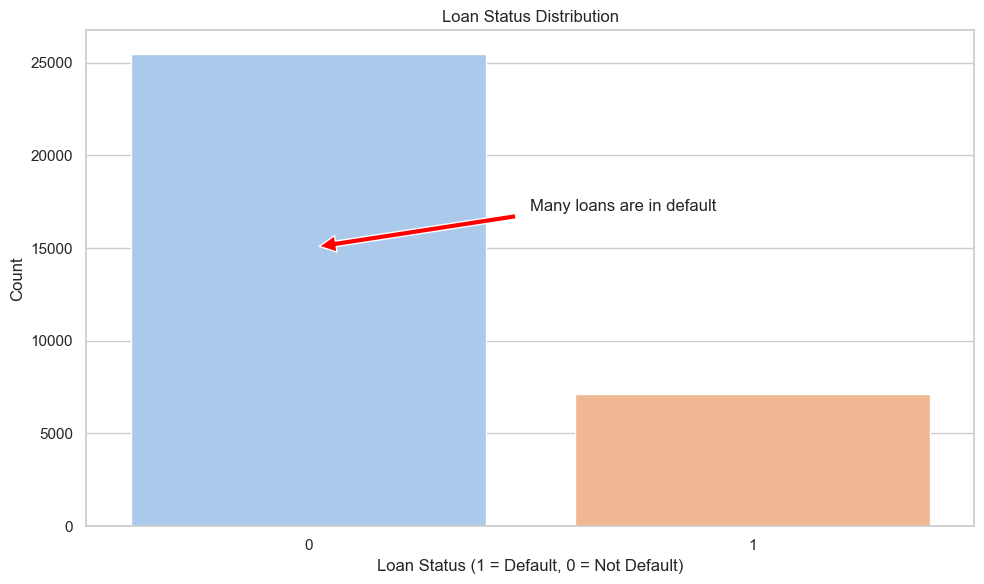

In [32]:
# Plot 2: Boxplot of interest rates by loan grade
plt.figure(figsize=(10,6))
sns.boxplot(x='loan_grade', y='loan_int_rate', data=df, palette='Set2')
plt.title('Interest Rates by Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Interest Rate (%)')
plt.annotate('Higher grades tend to have lower interest rates', xy=(1, 20), xytext=(2, 25),
             arrowprops=dict(facecolor='blue', shrink=0.05), fontsize=12)
plt.tight_layout()
plt.show()

# Plot 3: Bar chart of loan status
plt.figure(figsize=(10,6))
sns.countplot(x='loan_status', data=df, palette='pastel')
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status (1 = Default, 0 = Not Default)')
plt.ylabel('Count')
plt.annotate('Many loans are in default', xy=(0, 15000), xytext=(0.5, 17000),
             arrowprops=dict(facecolor='red', shrink=0.05), fontsize=12)
plt.tight_layout()
plt.show()

Descriptive Analysis Questions
1.	What is the distribution of loan amounts across different loan grades?
2.	How does the interest rate vary with different loan intents?
3.	What is the average income of borrowers who default versus those who do not?
4.	Is there a correlation between the length of employment and the likelihood of loan default?
5.	How does home ownership status impact loan default rates?


## 1. Distribution of Loan Amounts Across Different Loan Grades

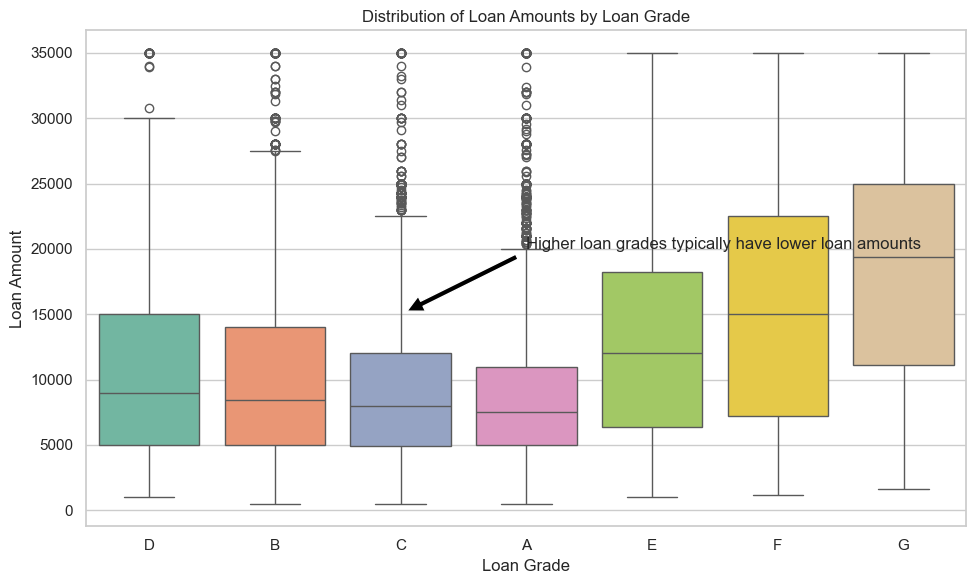

In [34]:
plt.figure(figsize=(10,6))
sns.boxplot(x='loan_grade', y='loan_amnt', data=df, palette='Set2')
plt.title('Distribution of Loan Amounts by Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Loan Amount')
plt.annotate('Higher loan grades typically have lower loan amounts', xy=(2, 15000), xytext=(3, 20000),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12)
plt.tight_layout()
plt.show()

## 2. How Does the Interest Rate Vary With Different Loan Intents?

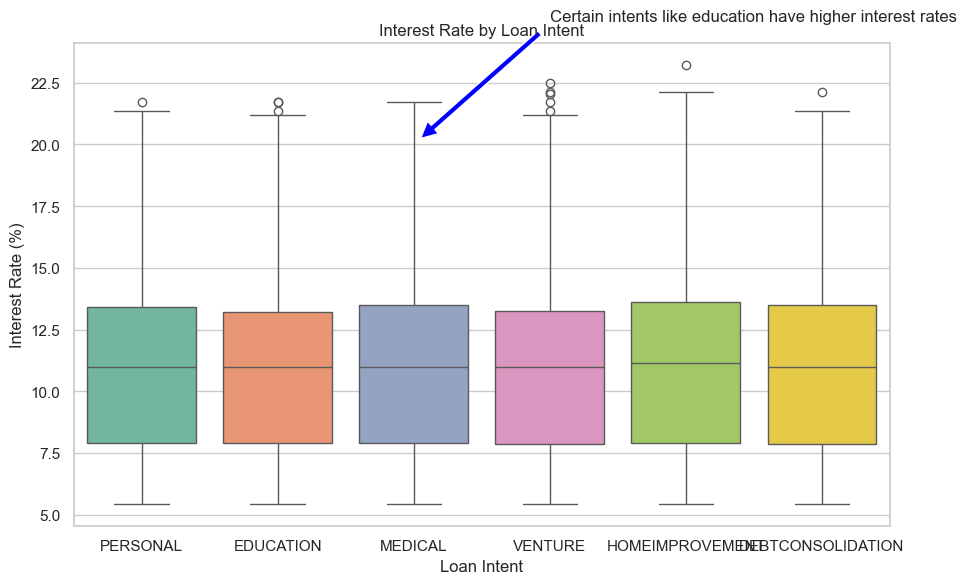

In [36]:
plt.figure(figsize=(10,6))
sns.boxplot(x='loan_intent', y='loan_int_rate', data=df, palette='Set2')
plt.title('Interest Rate by Loan Intent')
plt.xlabel('Loan Intent')
plt.ylabel('Interest Rate (%)')
plt.annotate('Certain intents like education have higher interest rates', xy=(2, 20), xytext=(3, 25),
             arrowprops=dict(facecolor='blue', shrink=0.05), fontsize=12)
plt.tight_layout()
plt.show()



## 3. Average Income of Borrowers Who Default Versus Those Who Do Not

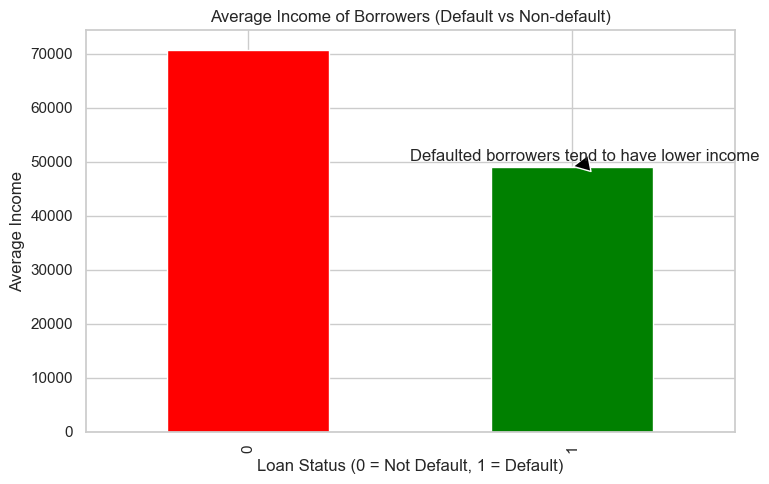

In [24]:
income_default = df.groupby('loan_status')['person_income'].mean()

plt.figure(figsize=(8,5))
income_default.plot(kind='bar', color=['red', 'green'])
plt.title('Average Income of Borrowers (Default vs Non-default)')
plt.xlabel('Loan Status (0 = Not Default, 1 = Default)')
plt.ylabel('Average Income')
plt.annotate('Defaulted borrowers tend to have lower income', xy=(1, income_default[1]), xytext=(0.5, income_default[1]+1000),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12)
plt.tight_layout()
plt.show()



## 4. Correlation Between Employment Length and Loan Default

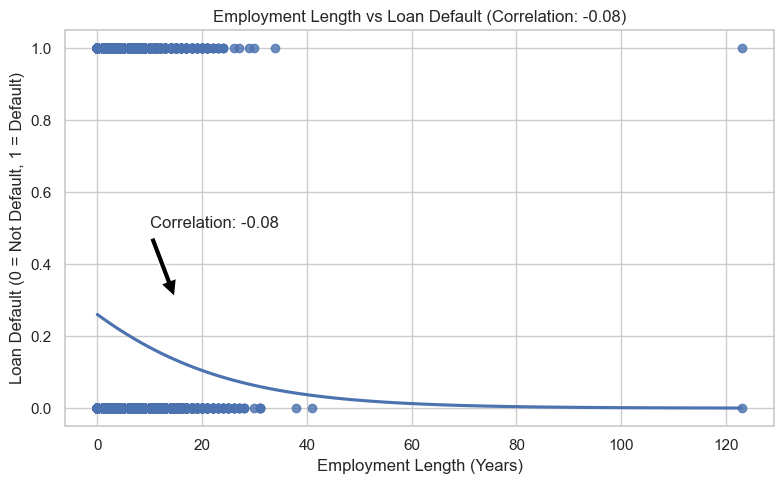

In [26]:
correlation = df['person_emp_length'].corr(df['loan_status'])
plt.figure(figsize=(8,5))
sns.regplot(x='person_emp_length', y='loan_status', data=df, logistic=True, ci=None)
plt.title(f'Employment Length vs Loan Default (Correlation: {round(correlation, 2)})')
plt.xlabel('Employment Length (Years)')
plt.ylabel('Loan Default (0 = Not Default, 1 = Default)')
plt.annotate(f'Correlation: {round(correlation, 2)}', xy=(15, 0.3), xytext=(10, 0.5),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12)
plt.tight_layout()
plt.show()

## 5. Impact of Home Ownership Status on Loan Default Rates

<Figure size 1000x600 with 0 Axes>

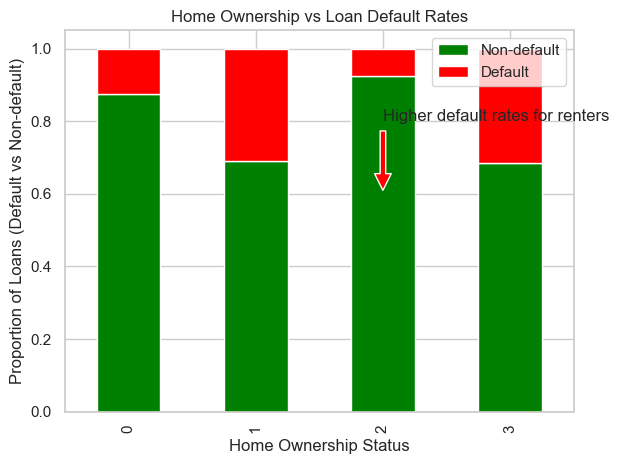

In [28]:
home_ownership_default = pd.crosstab(df['person_home_ownership'], df['loan_status'], normalize='index')

plt.figure(figsize=(10,6))
home_ownership_default.plot(kind='bar', stacked=True, color=['green', 'red'])
plt.title('Home Ownership vs Loan Default Rates')
plt.xlabel('Home Ownership Status')
plt.ylabel('Proportion of Loans (Default vs Non-default)')
plt.legend(['Non-default', 'Default'])
plt.annotate('Higher default rates for renters', xy=(2, 0.6), xytext=(2, 0.8),
             arrowprops=dict(facecolor='red', shrink=0.05), fontsize=12)
plt.tight_layout()
plt.show()

## Inferential Analysis

In [88]:
from scipy import stats
import pandas as pd

# Hypothesis Test 1: Difference in loan amounts between defaulted and non-defaulted loans
default_loans = df[df['loan_status'] == 1]['loan_amnt']
non_default_loans = df[df['loan_status'] == 0]['loan_amnt']

# Perform a t-test
t_stat, p_value = stats.ttest_ind(default_loans, non_default_loans, equal_var=False)
print(f"T-test Loan Amounts: t-statistic={t_stat}, p-value={p_value}")

# Hypothesis Test 2: Chi-square test for association between home ownership and loan default status
home_ownership_crosstab = pd.crosstab(df['person_home_ownership'], df['loan_status'])
chi2_stat, chi2_p_value, dof, expected = stats.chi2_contingency(home_ownership_crosstab)
print(f"Chi-square Home Ownership vs Loan Status: chi2-statistic={chi2_stat}, p-value={chi2_p_value}")

T-test Loan Amounts: t-statistic=16.71471006093236, p-value=8.325867762163513e-62
Chi-square Home Ownership vs Loan Status: chi2-statistic=1744.859991549557, p-value=0.0
